In [34]:

import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
#figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split


import warnings
# Ignore useless warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Avoid runtime error messages
pd.set_option('display.float_format', lambda x:'%f'%x)

np.random.seed(87)



/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [69]:
filepath = 'Admission_Predict_Ver1.1.csv'
data = pd.read_csv(filepath)

In [70]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,2,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,3,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,4,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,5,314,103,2,2.000000,3.000000,8.210000,0,0.650000


In [71]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.484000,8.576440,0.560000,0.721740
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.925450,0.604813,0.496884,0.141140
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.630000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [72]:
#check for missing values:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [73]:
#Serial No seems like a useless column, lets save it incase we need it and drop it
data_serialNo = data['Serial No.']
data.drop('Serial No.', axis=1,inplace=True)
print("Dropped Serial No.")
print(data.shape)
print(data.head(5))

Dropped Serial No.
(500, 8)
   GRE Score  TOEFL Score  University Rating      SOP     LOR      CGPA  \
0        337          118                  4 4.500000 4.500000 9.650000   
1        324          107                  4 4.000000 4.500000 8.870000   
2        316          104                  3 3.000000 3.500000 8.000000   
3        322          110                  3 3.500000 2.500000 8.670000   
4        314          103                  2 2.000000 3.000000 8.210000   

   Research  Chance of Admit   
0         1          0.920000  
1         1          0.760000  
2         1          0.720000  
3         1          0.800000  
4         0          0.650000  


In [79]:
print(data.dtypes)

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                   object
LOR                   object
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object


In [81]:
# Looks like SOP, LOR, Research are actually categorical variables, Lets convert them to categorical variables
temp = ["SOP","LOR ","Research","University Rating"]
for label in temp:
    data[label] = data[label].astype('object')
print("Converted to Category")

Converted to Category


In [82]:
#picking up numerical and categorical features:
numerical_features = data.dtypes[data.dtypes != "object"].index
categorical_features = data.dtypes[data.dtypes == "object"].index

print(numerical_features)
print(categorical_features)
for i,feature in enumerate(numerical_features,1):
    print (i, feature, sep=":")

for j,feature in enumerate(categorical_features,1):
    print (j, feature, sep="-")

#print(np.ceil((len(data.columns))/3))

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '], dtype='object')
Index(['University Rating', 'SOP', 'LOR ', 'Research'], dtype='object')
1:GRE Score
2:TOEFL Score
3:CGPA
4:Chance of Admit 
1-University Rating
2-SOP
3-LOR 
4-Research


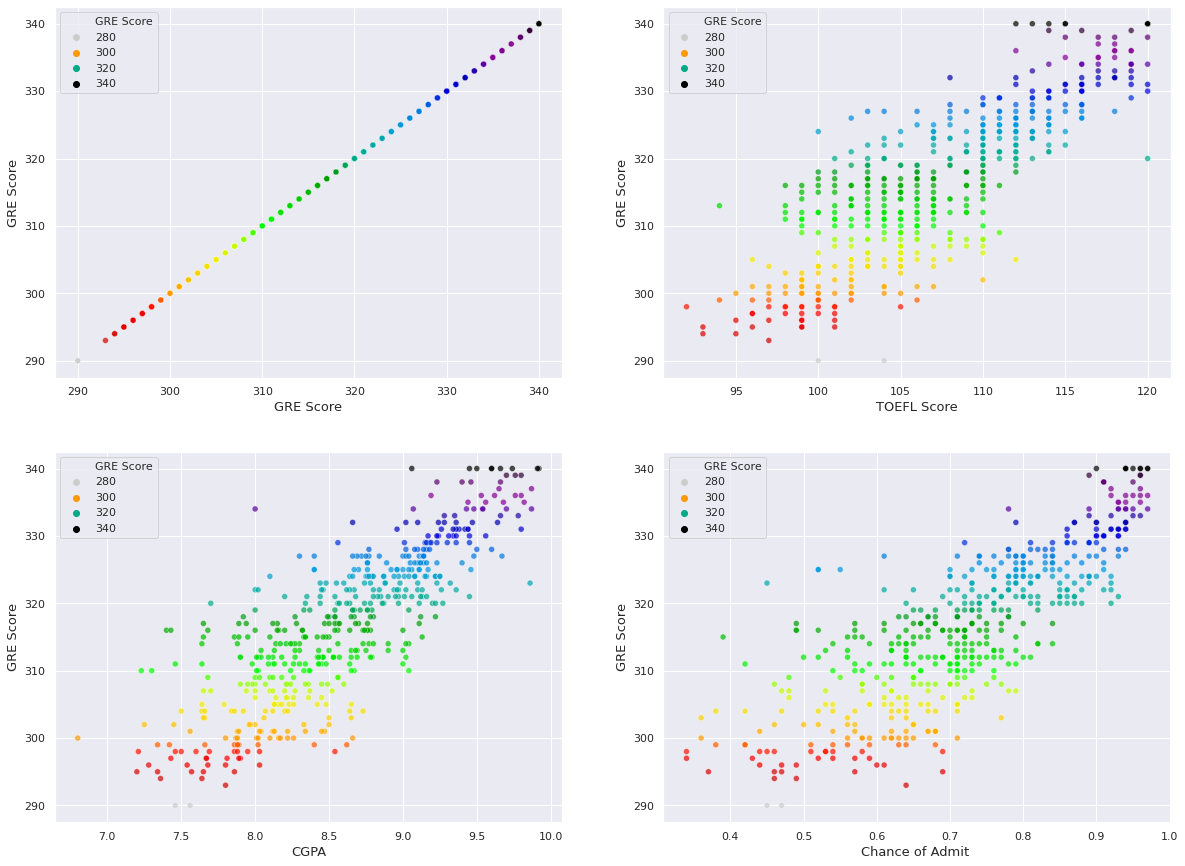

In [93]:
#plotting all numeric features against GRE Score
fig, ax = plt.subplots(figsize=(20,15))
sns.set(style='darkgrid')
length = len(numerical_features)
for i,feature in enumerate(numerical_features,1):
    plt.subplot(np.ceil(length/2), 2, i) #nrows,ncols,index
    sns.scatterplot(x = feature, y = 'GRE Score',data=data,alpha=0.7,hue="GRE Score", palette ='nipy_spectral_r',linewidth=0.5, edgecolor='white')
    #sns.regplot(x = feature, y="GRE Score",data=data,color='orange')
    plt.ylabel('GRE Score', fontsize=13)
    plt.xlabel(feature, fontsize=13)
plt.show()

* So it seems like people with higher GRE Scores also have higher CGPA, TOEFL Score and also has a higher chance of admission

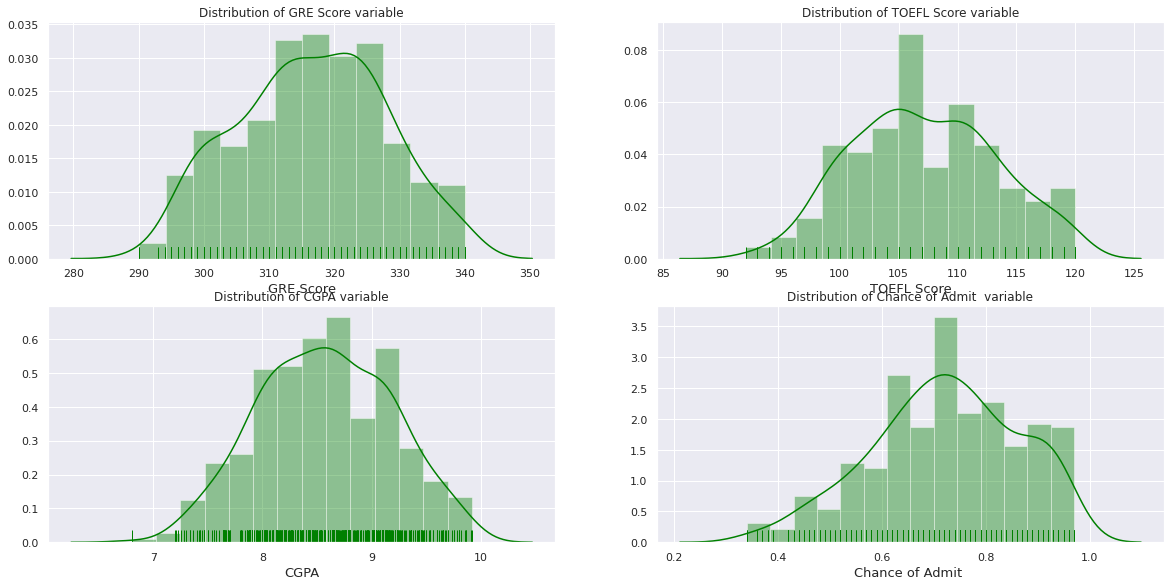

In [87]:
#plotting distributions of all numeric features
fig, ax = plt.subplots(figsize=(20,20))
sns.set(style='darkgrid')
length = len(data.columns)
for i,feature in enumerate(numerical_features,1):
    plt.subplot(np.ceil(length/2), 2, i) #nrows,ncols,index
    sns.distplot(data[feature], rug=True,color='green')
    plt.xlabel(feature, fontsize=13)
    plt.title("Distribution of {} variable".format(feature))
plt.show()

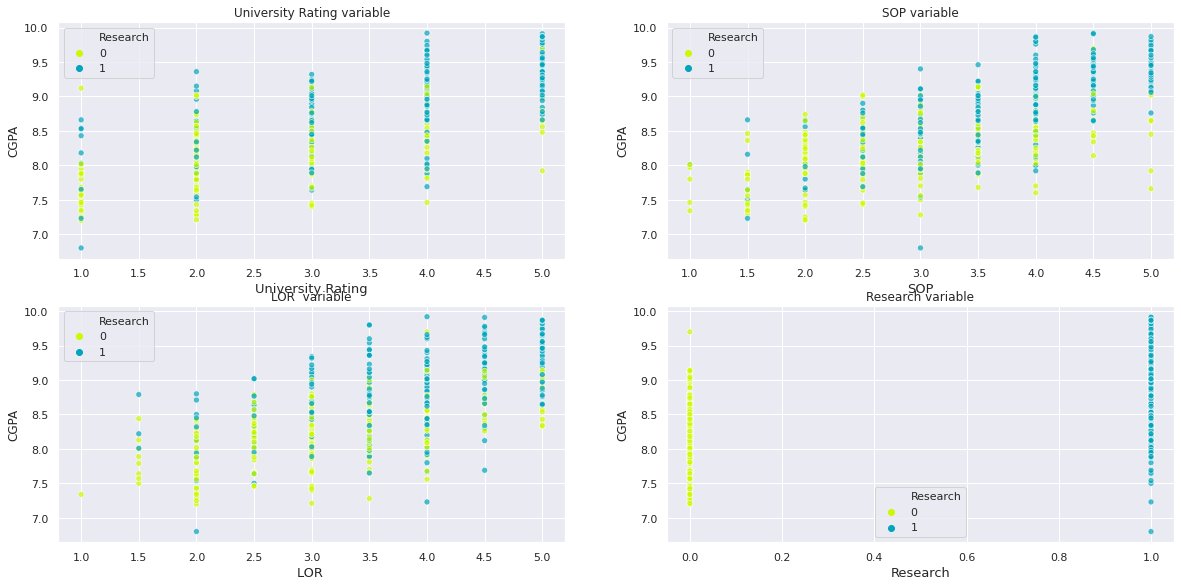

In [116]:
#plotting distributions of all categorical features
fig, ax = plt.subplots(figsize=(20,20))
sns.set(style='darkgrid')
length = len(data.columns)
for i,feature in enumerate(categorical_features,1):
    plt.subplot(np.ceil(length/2), 2, i) #nrows,ncols,index
    sns.scatterplot(x=feature,y="CGPA",data=data,alpha=0.7,hue="Research", palette ='nipy_spectral_r',linewidth=0.8, edgecolor='white')
    #sns.regplot(x = feature, y="GRE Score",data=data,color='orange')
    plt.xlabel(feature, fontsize=13)
    plt.title("{} variable".format(feature))
plt.show()

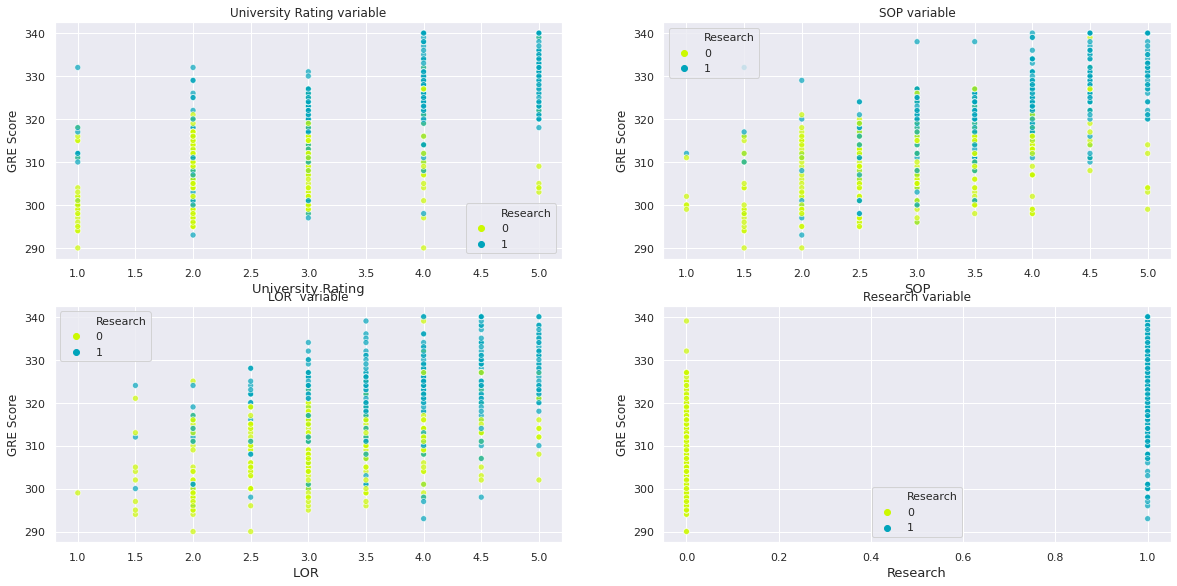

In [117]:
#plotting distributions of all categorical features
fig, ax = plt.subplots(figsize=(20,20))
sns.set(style='darkgrid')
length = len(data.columns)
for i,feature in enumerate(categorical_features,1):
    plt.subplot(np.ceil(length/2), 2, i) #nrows,ncols,index
    sns.scatterplot(x=feature,y="GRE Score",data=data,alpha=0.7,hue="Research", palette ='nipy_spectral_r',linewidth=0.8, edgecolor='white')
    #sns.regplot(x = feature, y="GRE Score",data=data,color='orange')
    plt.xlabel(feature, fontsize=13)
    plt.title("{} variable".format(feature))
plt.show()

* there is a largly clear indication that University which ahs higher rating takes majority of students with Research experience
* At the same time, Strength of Letter of Recommendation though largely correlates with CGPA, there are exceptions to the rule
* there is an indication that people with higher CGPA, also has better SOP, might make sense because higher CGPA suggests, more seriousness and hardworking students
* There is a similar relation between GRE Scores and LOR,SOP

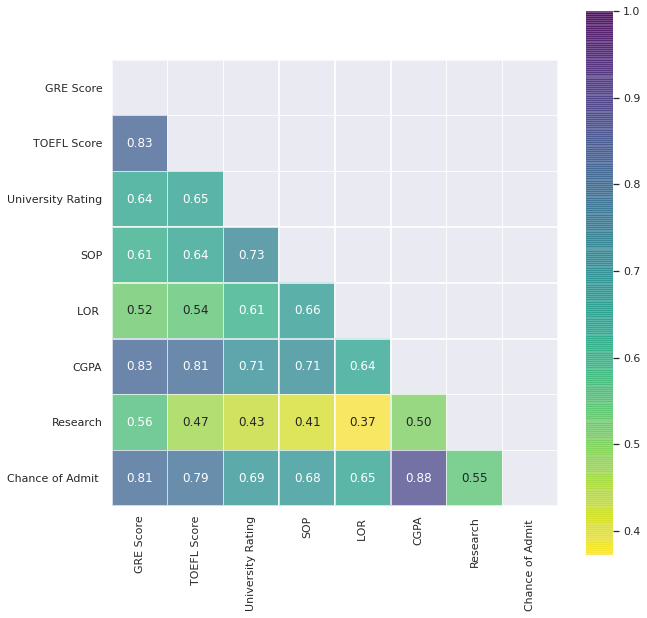

In [138]:

#Lets look at Correltion matrix between variables
data_temp = data.astype('float64')
#print(data_temp)
corr_mat = data_temp.corr()
self_corr = np.zeros_like(corr_mat)
self_corr[np.triu_indices_from(self_corr)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap (corr_mat, square = True,cmap="viridis_r",alpha=0.7,linewidth=0.5,edgecolor='white',fmt=".2f", annot=True,mask=self_corr)

In [143]:
corr_mat['Chance of Admit '].sort_values(ascending=False)

Chance of Admit     1.000000
CGPA                0.882413
GRE Score           0.810351
TOEFL Score         0.792228
University Rating   0.690132
SOP                 0.684137
LOR                 0.645365
Research            0.545871
Name: Chance of Admit , dtype: float64

* So GRE Score, TOEFL Score, CGPA are top 3 correlated variables with a chance of admission

In [147]:
print(data[numerical_features])

     GRE Score  TOEFL Score     CGPA  Chance of Admit 
0          337          118 9.650000          0.920000
1          324          107 8.870000          0.760000
2          316          104 8.000000          0.720000
3          322          110 8.670000          0.800000
4          314          103 8.210000          0.650000
..         ...          ...      ...               ...
495        332          108 9.020000          0.870000
496        337          117 9.870000          0.960000
497        330          120 9.560000          0.930000
498        312          103 8.430000          0.730000
499        327          113 9.040000          0.840000

[500 rows x 4 columns]


In [152]:
#Log transforming all numerical features to avoid any skewness

from scipy.stats import skew
skewed_feats = data[numerical_features].apply(lambda x: skew(x.dropna())) #compute skewness
print(skewed_feats)
skewed_feats = skewed_feats.index
skewed_feats

GRE Score          -0.039722
TOEFL Score         0.095314
CGPA               -0.026533
Chance of Admit    -0.289096
dtype: float64


Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '], dtype='object')

In [153]:
#Applying log transform to all the skewed variables in the full dataset
data[skewed_feats] = np.log1p(data[skewed_feats])
print("Transformed all Numerical Features")

Transformed all Numerical Features


In [154]:
#creating Dummy variables from the categorical Data
data = pd.get_dummies(data)
print("created dummy variables")

created dummy variables


In [155]:
data.head(10)

,GRE Score,TOEFL Score,CGPA,Chance of Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.0,...,LOR _1.5,LOR _2.0,LOR _2.5,LOR _3.0,LOR _3.5,LOR _4.0,LOR _4.5,LOR _5.0,Research_0,Research_1
0,5.823046,4.779123,2.365560,0.652325,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,5.783825,4.682131,2.289500,0.565314,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,5.758902,4.653960,2.197225,0.542324,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,5.777652,4.709530,2.269028,0.587787,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.752573,4.644391,2.220290,0.500775,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,5.802118,4.753590,2.336020,0.641854,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
6,5.774552,4.700480,2.219203,0.559616,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,5.733341,4.624973,2.186051,0.518794,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,5.713733,4.634729,2.197225,0.405465,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,5.780744,4.691348,2.261763,0.371564,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [231]:
#Splitting data
#chance of Admit is our target variable
X = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=False)
print("X_train: ",X_train.shape,"X_test: ",X_test.shape,"y_train: ",y_train.shape,"y_test: ",y_test.shape)

X_train:  (400, 28) X_test:  (100, 28) y_train:  (400,) y_test:  (100,)


In [232]:
#Import Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


In [233]:
#setup KFold with 10 splits
kf = KFold(n_splits=10,random_state=23, shuffle=True)

In [234]:
#Define our RMSE function: Root Mean Squared Error
def rmse_cross_val (model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

#we have already scaled back our outliers, even then lets define our RMSLE function: Root Mean Squared log Error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y_train,y_pred))
print("Defined RMSE function")

Defined RMSE function


In [235]:
#Linear Regression
lreg = LinearRegression()

#LightGBM Regressor
lightgbm = LGBMRegressor(objective='regression',
                         num_leaves=6,
                         learning_rate=0.01,
                         n_estimators=7000,
                         max_bin=200,
                         bagging_fractions=0.8,
                         bagging_freq=4,
                         feature_fractions=0.2,
                         feature_fraction_seed=8,
                         min_sum_hessian_in_leaf=11,
                         verbose=-1,
                         random_state=23)
#XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective="reg:squarederror",
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=22,
                       reg_alpha=0.00006,
                       random_state=23)
                         
    
#RidgeRegressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(),RidgeCV(alphas=ridge_alphas, cv=kf))


#supportvectorregressor
svr = make_pipeline(RobustScaler(),SVR(C=20,epsilon=0.008,gamma=0.0003))

#gradientboostregressor
gbr = GradientBoostingRegressor(n_estimators = 6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=23)
#random forest regressor
rf = RandomForestRegressor(n_estimators=1200,
                           max_depth=5,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=23)

#Stack all Models

stack_gen = StackingCVRegressor(regressors=(lreg,xgboost,lightgbm,svr,ridge,gbr,rf),
                                meta_regressor=svr,
                                use_features_in_secondary=True)

Generating rms scores for all our regressors

In [236]:
scores={}
score = rmse_cross_val(lreg)
print("Liner regression: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['lreg'] = (score.mean(),score.std())
score = rmse_cross_val(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['lgb'] = (score.mean(),score.std())
score = rmse_cross_val(xgboost)
print("XGBoost: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['xgboost'] = (score.mean(),score.std())
score = rmse_cross_val(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['svr'] = (score.mean(),score.std())
score = rmse_cross_val(ridge)
print("Ridge: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['ridge'] = (score.mean(),score.std())
score = rmse_cross_val(rf)
print("RandomForest: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['rf'] = (score.mean(),score.std())
score = rmse_cross_val(gbr)
print("Gradientboostingregressor: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['gbr'] = (score.mean(),score.std())


Liner regression: 0.0409 (0.0044)
lightgbm: 0.0487 (0.0060)
XGBoost: 0.0684 (0.0136)
SVR: 0.0409 (0.0065)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.44741e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.14789e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.29978e-18): result may not be accurate.
  overwrite_a=True).T


Ridge: 0.0405 (0.0056)
RandomForest: 0.0420 (0.0052)
Gradientboostingregressor: 0.0457 (0.0061)


### Training all the models

In [237]:
print("Linear Regression")
lreg_model_full_data=lreg.fit(X_train,y_train)

print("lightgbm")
lgbm_model_full_data=lightgbm.fit(X_train,y_train)

print("xgboost")
xgbm_model_full_data=xgboost.fit(X_train,y_train)

print("svr")
svr_model_full_data=svr.fit(X_train,y_train)

print("Ridge")
ridge_model_full_data=ridge.fit(X_train,y_train)

print("RandomForest")
rf_model_full_data=rf.fit(X_train,y_train)

print("gradientBoosting")
gbr_model_full_data=gbr.fit(X_train,y_train)

print("stacked models")
stack_gen_model_full_data=stack_gen.fit(X_train,y_train)

Linear Regression
lightgbm
xgboost
svr
Ridge


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.17371e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.45823e-18): result may not be accurate.
  overwrite_a=True).T


RandomForest
gradientBoosting
stacked models


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.17371e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.45823e-18): result may not be accurate.
  overwrite_a=True).T


In [238]:
def blended_predictions(X_train):
    return ((0.1 * ridge_model_full_data.predict(X_train))+
            (0.1 * svr_model_full_data.predict(X_train))+
            (0.1 * gbr_model_full_data.predict(X_train))+
            (0.1 * xgbm_model_full_data.predict(X_train))+
            (0.1 * lgbm_model_full_data.predict(X_train))+
            (0.1 * rf_model_full_data.predict(X_train))+
            (0.1 * lreg_model_full_data.predict(X_train))+
            (0.30 * stack_gen_model_full_data.predict(np.array(X_train))))

In [239]:
#Getting final predictions
blended_score = rmsle(y, blended_predictions(X_train))
scores['blended'] = (blended_score,0)
print("RMSLE Score on training data:")
print(blended_score)

RMSLE Score on training data:
0.035001450635048836


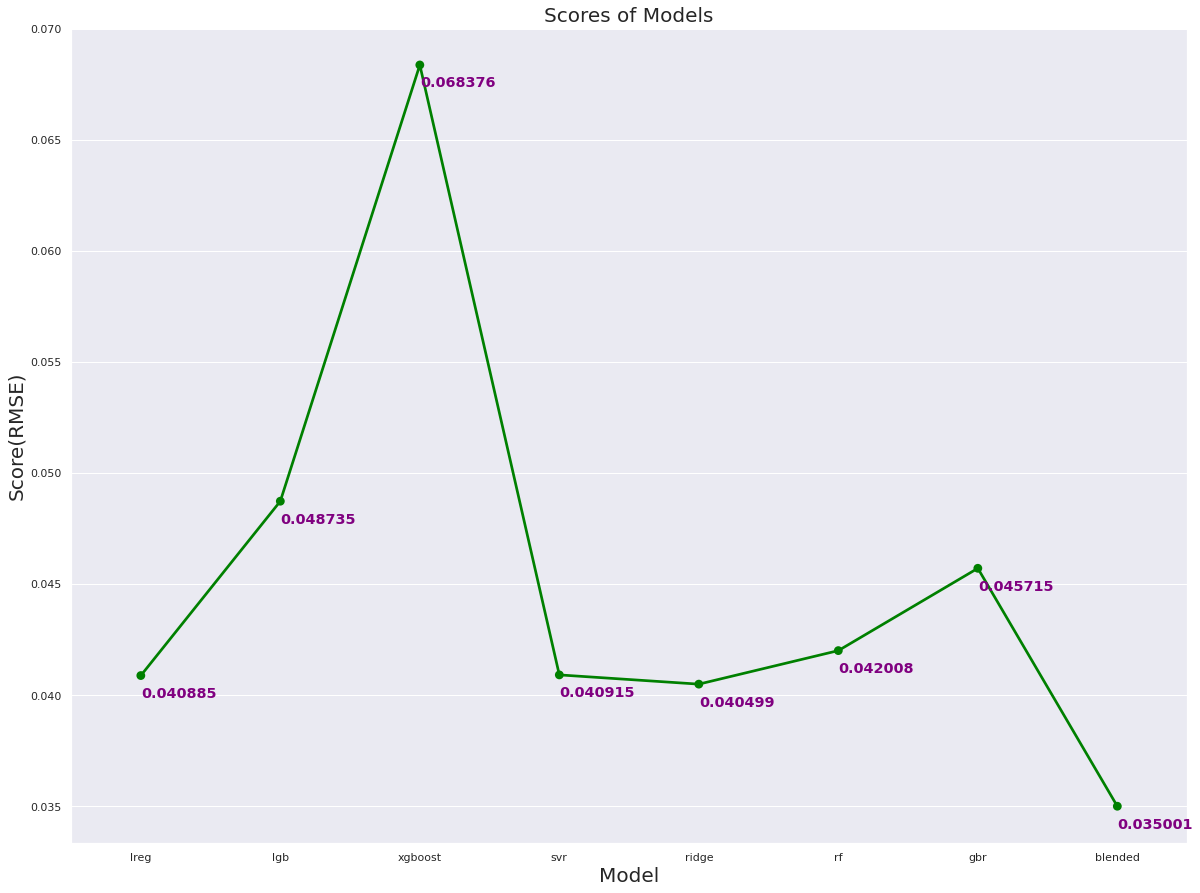

In [240]:
#Identifying best model
f, ax = plt.subplots(figsize=(20, 15))
ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'],color='green')
for i, score in enumerate(scores.values()):
    ax.text(i,score[0]-0.001,'{:.6f}'.format(score[0]),horizontalalignment='left',size='large',color='purple',weight='semibold')
plt.ylabel('Score(RMSE)',size=20)
plt.xlabel('Model',size=20)
plt.title("Scores of Models",size=20)
plt.show()


* Well, SVR is our best performing model, and simple Linear Regression is second best, beating, all other advanced models
* so while stacking the models, I increased the weightage of  SVR

In [241]:
#Generating final predictions
blendPred = blended_predictions(X_test)

In [242]:
submission = pd.DataFrame()
submission['actual'] = y_test
submission['predictions'] = blendPred
submission['residuals'] = submission['actual']-submission['predictions']
submission['rmsescore']= np.absolute(submission['residuals']/submission['actual']*100)
submission = submission.reset_index()
submission.drop('index',axis=1,inplace=True)

In [243]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '% 2f' % x)
submission.sort_values(by = ['rmsescore'])

,actual,predictions,residuals,rmsescore
2,0.576613,0.576911,-0.000298,0.051603
97,0.657520,0.656870,0.000650,0.098928
34,0.494696,0.495238,-0.000541,0.109419
10,0.431782,0.432269,-0.000486,0.112651
58,0.524729,0.524121,0.000608,0.115844
68,0.593327,0.592565,0.000762,0.128481
25,0.652325,0.651363,0.000962,0.147548
96,0.672944,0.671863,0.001082,0.160716
1,0.506818,0.507777,-0.000959,0.189216
43,0.625938,0.623223,0.002715,0.433785
